# Project: Wrangling and Analyze Data

In [164]:
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image.content)

df2 = pd.read_csv('image_predictions.tsv', sep = '\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**How to set-up Twitter API**

Temporary credentials:

* Request Token === oauth_token
* Request Token Secret === oauth_token_secret
* oauth_verifier


Access token

1530238502633459713-O9uxuQDSxmDfk3IN0VwA5xvEt8hogg

Access token Secret 

ekH8zzk0dVgkVbV6LzZ25DqaFmSKjYJ5LajtrHbOoM65i

Bearer Token

AAAAAAAAAAAAAAAAAAAAAKfegQEAAAAAjm7HcbIXSWH9dVxFMaVcFkoZmN0%3DLm2PybknA4QiOzh4cizDfKJvS7e6hqYFzYqxZzbteLmhiVp7jJ

API Key

1BE18QbbWnCvkpCpasMtixY1T

API Key Secret

KJ9boyoEVOWmNNeVTEpNpvuQkVPKFOjl9ymuXtyzDhrNp8zGJL



In [30]:
api_key = consumer_key = '1BE18QbbWnCvkpCpasMtixY1T'
api_secret = consumer_secret = 'KJ9boyoEVOWmNNeVTEpNpvuQkVPKFOjl9ymuXtyzDhrNp8zGJL'
access_token = '1530238502633459713-O9uxuQDSxmDfk3IN0VwA5xvEt8hogg'
access_token_secret = 'ekH8zzk0dVgkVbV6LzZ25DqaFmSKjYJ5LajtrHbOoM65i'

auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

**Matching DF1 with Twitter API**

Now we must download new info based on the ids of our previous df1 database.

In [31]:
#Matched tweets
tweets = []
# Mistmatched tweets
n_tweets = []

for tweet_id in df1['tweet_id']:   
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        n_tweets.append(tweet_id)
 
print("The list of tweets", len(tweets))
print("The list of tweets not found", len(n_tweets))

The list of tweets 873
The list of tweets not found 1483


**JSON Treatment**

This part is basically uniting all json parts from each tweet and uniting them into a single json

In [37]:
dic = []

#getting the json
for json_tweet in tweets:
    dic.append(json_tweet)

#writing json to a txt
with open('json_tweet.txt', 'w') as file:
        file.write(json.dumps(dic, indent=4))

In [38]:

#identifying and labeling information from txt
list = []

with open('json_tweet.txt', encoding='utf-8') as json_file:  
    alldics = json.load(json_file)
    
    for dic in alldics:
        id = dic['id']
        text = dic['text']
        url = text[text.find('https'):]
        favorites = dic['favorite_count']
        retweets = dic['retweet_count']
        followers = dic['user']['followers_count']
        friends = dic['user']['friends_count']
        whole_source = dic['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = dic['retweeted_status'] = dic.get('retweeted_status', 'Original tweet')

        if retweeted_status == 'Original tweet':
            url = url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        list.append({'tweet_id': str(id),
                             'favorite_count': int(favorites),
                             'retweet_count': int(retweets),
                             'followers_count': int(followers),
                             'friends_count': int(friends),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
                            
        df3 = pd.DataFrame(list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          873 non-null    object
 1   favorite_count    873 non-null    int64 
 2   retweet_count     873 non-null    int64 
 3   followers_count   873 non-null    int64 
 4   friends_count     873 non-null    int64 
 5   source            873 non-null    object
 6   retweeted_status  873 non-null    object
 7   url               873 non-null    object
dtypes: int64(4), object(4)
memory usage: 54.7+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [107]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [108]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [40]:
df3.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,33711,6975,9353138,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29233,5276,9353138,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,21983,3466,9353138,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36807,7197,9353137,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35193,7721,9353138,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


### Programmatic Assessment

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [111]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          873 non-null    object
 1   favorite_count    873 non-null    int64 
 2   retweet_count     873 non-null    int64 
 3   followers_count   873 non-null    int64 
 4   friends_count     873 non-null    int64 
 5   source            873 non-null    object
 6   retweeted_status  873 non-null    object
 7   url               873 non-null    object
dtypes: int64(4), object(4)
memory usage: 54.7+ KB


In [119]:
#Checking denominators since they must stop at 10
df1[df1.rating_denominator > 10].rating_denominator.value_counts()

11     3
50     3
20     2
80     2
15     1
70     1
150    1
170    1
90     1
40     1
130    1
110    1
16     1
120    1
Name: rating_denominator, dtype: int64

In [120]:
print(df1.loc[df1.rating_denominator == 11, 'text'])
print(df1.loc[df1.rating_denominator == 50, 'text'])
print(df1.loc[df1.rating_denominator == 20, 'text'])
print(df1.loc[df1.rating_denominator == 80, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object
1165    Happy 4/20 from the squad! 13/10 for all https...
1598    Yes I do realize a rating of 4/20 would've bee...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object


In [122]:
#Retweets must be deleted afterwards during cleaning step
print(df1['text'][784]) 
#It captured the date and not the rating. Actual rate is 14/10
print(df1['text'][1068]) 
#Captured wrong number. Actual rate is 10/10
print(df1['text'][1662])
#Captured wrong number. Actual rate is 11/10
print(df1['text'][1202]) 
#Tweet with no rating - delete it afterwards
print(df1['text'][1274]) 
#Tweet with no rating - delete it afterwards
print(df1['text'][1351]) 
#Actual rating is 13/10 - change it afterwards
print(df1['text'][1165]) 
#Complaining about rating - no actual rating
print(df1['text'][1598]) 
# Incorrect rating - actual rating after checking on the image would be 10/10 since there is 8 dogs - collective rating
print(df1['text'][1254]) 
# Incorrect rating - actual rating after checking on the image would be 11/10 since there is 8 dogs - collective rating
print(df1['text'][1843]) 

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Here's a brigade of puppers. A

In [48]:
df2.jpg_url.duplicated().sum()

66

In [45]:
df3.retweeted_status.value_counts()

Original tweet       725
This is a retweet    148
Name: retweeted_status, dtype: int64

### Quality issues
1. In dataframe1 the columns timestamp is not a timestamp Dtype or date

2. In dataframe1 the Doggo, floofer, pupper, puppo has nulls rows not being categorized as nulls

3. Drop useless columns such as 'source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'

4. Incorrected ratings done in rating_denominator from dataframe1

5. Delete retweets

6. Keep originals tweets only in df3

7. Drop 66 jpg_url duplicated from df2

8. Drop useless columns from df2 and create new columns using the predictions

### Tidiness issues
1.  Change tweet_ids from the all datasets in order to have the same type

2. Unite all tables into one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [131]:
# Make copies of original pieces of data
df_archive = df1.copy()
df_image = df2.copy()
df_tweet = df3.copy()

### Issue #1: Twitter Archives Problems

#### Define:

1. Keep original ratings
2. Erroneous datatypes (doggo, floofer, pupper and puppo columns)
3. Change timestamp from object into date type and create 3 new columns (day, month, year)
4. Correct numerators
5. Correct denominators

#### Code

In [132]:
# Deleting retweets
# retweeted_status_id and retweeted_status_user_id indicates the retweets.  Delete the retweets. 
# When I merge twitter_archive and image_prediction, there will be only the ones with images.
df_archive = df_archive[pd.isnull(df_archive['retweeted_status_user_id'])]

#Checking retweets
print('Checking retweets: {}'.format(df_archive.retweeted_status_user_id.sum()))

Checking retweets: 0.0


In [133]:
#Dropping useless columns
df_archive.drop(columns={'source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'}, inplace=True)


#Checking drop columns
print('Checking drop columns: {}'.format(df_archive.columns.values))

Checking drop columns: ['tweet_id' 'timestamp' 'text' 'rating_numerator' 'rating_denominator'
 'name' 'doggo' 'floofer' 'pupper' 'puppo']


In [134]:
# Erroneous datatypes
# Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
df_archive = pd.melt(df_archive, id_vars=['tweet_id', 'timestamp','text','rating_numerator','rating_denominator','name'],var_name='dogs', value_name='dogs_stage')
df_archive.drop(columns={'dogs'}, inplace=True)
df_archive['dogs_stage'] = df_archive['dogs_stage'].astype(str)
df_archive = df_archive.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')

#Checking erroneous datatypes
df_archive['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [135]:
# Treating timestamp columns and creating new columns

df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

df_archive['year'] = df_archive['timestamp'].dt.year
df_archive['month'] = df_archive['timestamp'].dt.month
df_archive['day'] = df_archive['timestamp'].dt.day

#Checking 
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   dogs_stage          2175 non-null   object             
 7   year                2175 non-null   int64              
 8   month               2175 non-null   int64              
 9   day                 2175 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(6), object(3)
memory usage: 186.9+ KB


In [136]:
#Retweets must be deleted afterwards during cleaning step
print(df1['tweet_id'][784]) 
#It captured the date and not the rating. Actual rate is 14/10
print(df1['tweet_id'][1068]) 
#Captured wrong number. Actual rate is 10/10
print(df1['tweet_id'][1662])
#Captured wrong number. Actual rate is 11/10
print(df1['tweet_id'][1202]) 
#Tweet with no rating - delete it afterwards
print(df1['tweet_id'][1274]) 
#Tweet with no rating - delete it afterwards
print(df1['tweet_id'][1351]) 
#Actual rating is 13/10 - change it afterwards
print(df1['tweet_id'][1165]) 
#Complaining about rating - no actual rating
print(df1['tweet_id'][1598]) 
# Incorrect rating - actual rating after checking on the image would be 10/10 since there is 8 dogs - collective rating
print(df1['tweet_id'][1254]) 
# Incorrect rating - actual rating after checking on the image would be 11/10 since there is 8 dogs - collective rating
print(df1['tweet_id'][1843]) 

775096608509886464
740373189193256964
682962037429899265
716439118184652801
709198395643068416
704054845121142784
722974582966214656
686035780142297088
710658690886586372
675853064436391936


In [137]:
#CODE: Update both numerators and denominators
df_archive.loc[(df_archive.tweet_id == 740373189193256964), 'rating_numerator'] = 14
df_archive.loc[(df_archive.tweet_id == 740373189193256964), 'rating_denominator'] = 10

df_archive.loc[(df_archive.tweet_id == 682962037429899265), 'rating_numerator'] = 10
df_archive.loc[(df_archive.tweet_id == 682962037429899265), 'rating_denominator'] = 10

df_archive.loc[(df_archive.tweet_id == 716439118184652801), 'rating_numerator'] = 11
df_archive.loc[(df_archive.tweet_id == 716439118184652801), 'rating_denominator'] = 10

df_archive.loc[(df_archive.tweet_id == 710658690886586372), 'rating_numerator'] = 10
df_archive.loc[(df_archive.tweet_id == 710658690886586372), 'rating_denominator'] = 10

df_archive.loc[(df_archive.tweet_id == 675853064436391936), 'rating_numerator'] = 11
df_archive.loc[(df_archive.tweet_id == 675853064436391936), 'rating_denominator'] = 10

df_archive.loc[(df_archive.tweet_id == 722974582966214656), 'rating_numerator'] = 13
df_archive.loc[(df_archive.tweet_id == 722974582966214656), 'rating_denominator'] = 10

#Deleting rows
df_archive = df_archive[df_archive['tweet_id'] != 686035780142297088]
df_archive = df_archive[df_archive['tweet_id'] != 704054845121142784]
df_archive = df_archive[df_archive['tweet_id'] != 709198395643068416]

In [182]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
df_archive['rating'] = 10 * df_archive['rating_numerator'] / df_archive['rating_denominator'].astype(float)

### Issue Problems: Image_prediction

In [183]:
# Dropping duplicates
df_image = df_image.drop_duplicates(subset=['jpg_url'], keep='last')

print('Checking image duplicates: {}'.format(df_image['jpg_url'].duplicated().sum()))

Checking image duplicates: 0


In [ ]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_breed = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(df_image):
    if df_image['p1_dog'] == True:
        dog_breed.append(df_image['p1'])
        confidence_list.append(df_image['p1_conf'])
    elif df_image['p2_dog'] == True:
        dog_breed.append(df_image['p2'])
        confidence_list.append(df_image['p2_conf'])
    elif df_image['p3_dog'] == True:
        dog_breed.append(df_image['p3'])
        confidence_list.append(df_image['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
df_image.apply(image, axis=1)

#create new columns
df_image['dog_breed'] = dog_breed
df_image['confidence_list'] = confidence_list

#drop rows that has prediction_list 'error'
df_image = df_image[df_image['dog_breed'] != 'Error']


In [140]:
#Delete columns
df_image = df_image.drop(['img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#TEST
print('Checking df_image: {}'.format(df_image.columns.values))

Checking df_image: ['tweet_id' 'jpg_url' 'dog_breed' 'confidence_list']


C:\Users\Felipe Silverio\AppData\Local\Temp\ipykernel_18504\2481678697.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_image = df_image.drop(['img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


### Issue Problems: Tweet json

In [141]:
#CODE:
df_tweet = df_tweet[df_tweet['retweeted_status'] == 'Original tweet']

#testing
print('Checking non-original tweets existence: {}'.format(df_tweet['retweeted_status'].value_counts()))

Checking non-original tweets existence: Original tweet    725
Name: retweeted_status, dtype: int64


### Tilderness

In [187]:
#Standardize all tweet_ids
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)
df_image['tweet_id'] = df_image['tweet_id'].astype(str)
df_tweet['tweet_id'] = df_tweet['tweet_id'].astype(str)

#create a new dataframe that merge twitter_archive_clean
df_twitter = pd.merge(df_archive, df_image, how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]


#Merging new dataframe
df_twitter = pd.merge(df_twitter, df_tweet, 
                      how = 'left', on = ['tweet_id'])

#checking
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1624 non-null   object             
 1   timestamp           1624 non-null   datetime64[ns, UTC]
 2   text                1624 non-null   object             
 3   rating_numerator    1624 non-null   int64              
 4   rating_denominator  1624 non-null   int64              
 5   name                1624 non-null   object             
 6   dogs_stage          1624 non-null   object             
 7   year                1624 non-null   int64              
 8   month               1624 non-null   int64              
 9   day                 1624 non-null   int64              
 10  rating              1624 non-null   float64            
 11  jpg_url             1624 non-null   object             
 12  dog_breed           1624 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [188]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [200]:
dog_breed['dog_breed'].value_counts().reset_index()

,index,dog_breed
0,golden_retriever,143
1,Labrador_retriever,103
2,Pembroke,94
3,Chihuahua,87
4,pug,60
5,toy_poodle,50
6,chow,45
7,Pomeranian,42
8,Samoyed,38
9,malamute,32


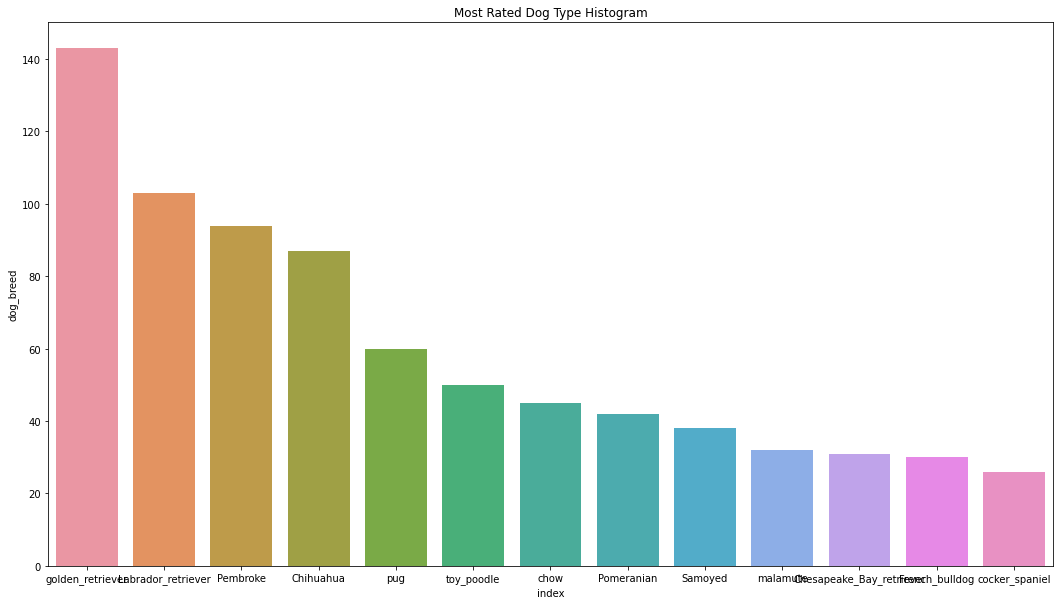

<Figure size 432x288 with 0 Axes>

In [201]:
dog_breed = df_twitter.groupby('dog_breed').filter(lambda x: len(x) >= 25)

graf = dog_breed['dog_breed'].value_counts()
fig = plt.figure(figsize=(18,10))

sns.barplot(x='index', y='dog_breed', data = graf.reset_index())
plt.title('Most Rated Dog Type Histogram')
plt.show()

fig = plt.gcf() 
fig.savefig('dog_breed_hist.png',bbox_inches='tight')

[]

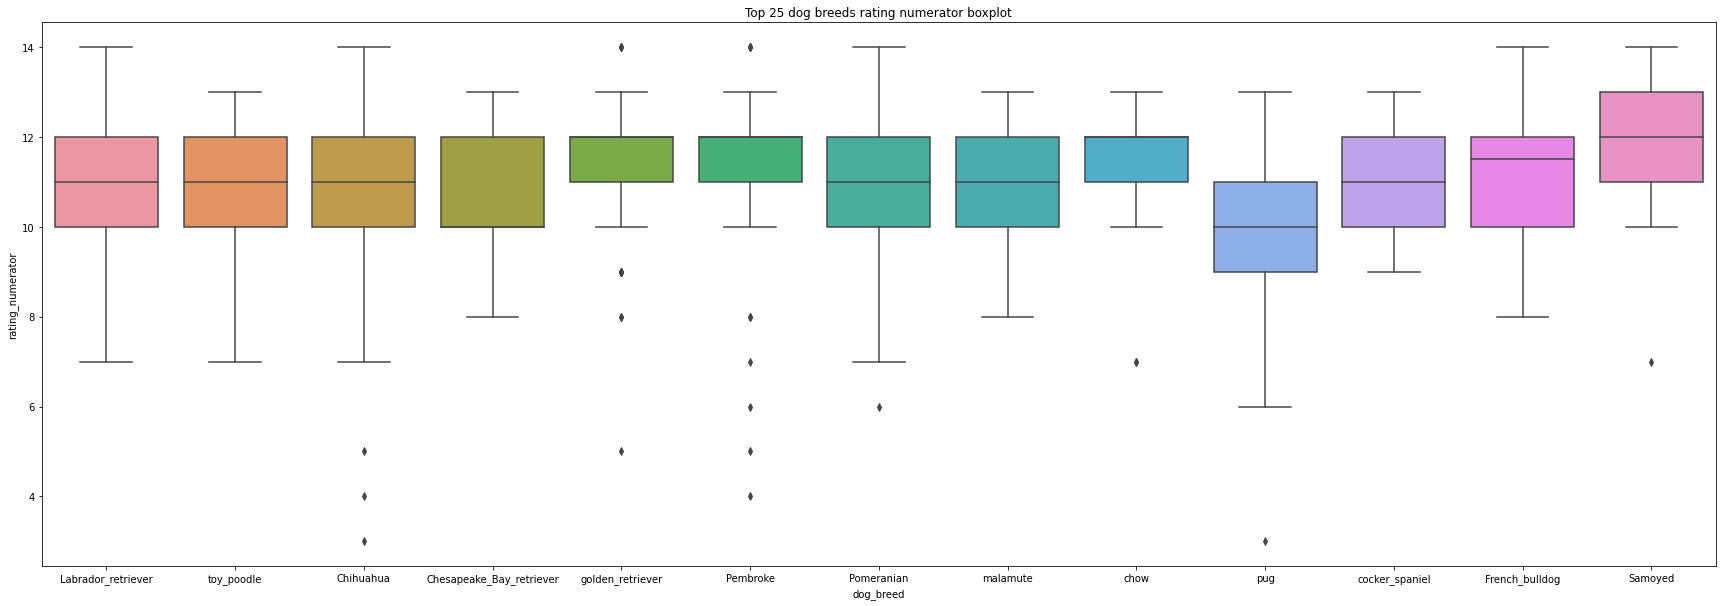

In [190]:
#df_twitter[df_twitter.dog_breed.isin(dog_breed.dog_breed.unique())]


fig = plt.figure(figsize=(30,10))
sns.boxplot(x='dog_breed', y='rating_numerator', data=dog_breed[dog_breed.rating_numerator < 20])
plt.title('Top 25 dog breeds rating numerator boxplot')

fig = plt.gcf() 
fig.savefig('dog_breed_boxplot.png',bbox_inches='tight');

plt.plot()

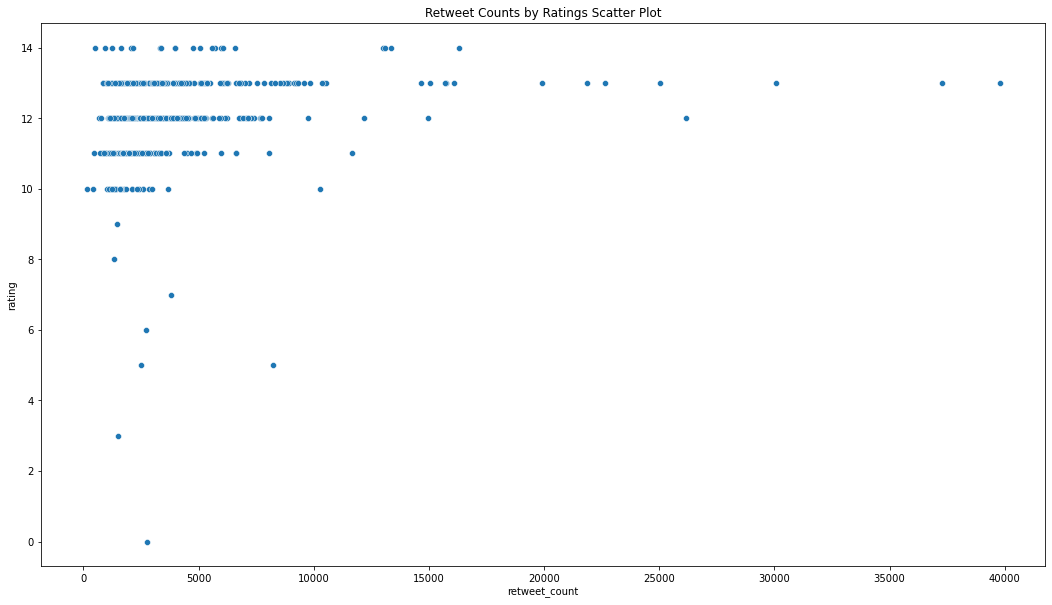

In [198]:
fig = plt.figure(figsize=(18,10))
sns.scatterplot(x='retweet_count', y='rating', data=df_twitter[df_twitter.rating < 20])
plt.title('Retweet Counts by Ratings Scatter Plot')
plt.plot()

fig = plt.gcf()
fig.savefig('dog_breeed_retweets.png',bbox_inches='tight')

### Insights:
1. The most rated dog breeds are golden_retriever, labrador_retriever, pembroke and chihuaha

2. The dog breeds with the most spread out ratings are pug, pomeranian and chihuaha. The dog breeds with most concentrated reviews are golden_retriever, pembroke and chow.

3. The highest ratings receives the most retweets